In [ ]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv('QualityPrediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.shape

(1599, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

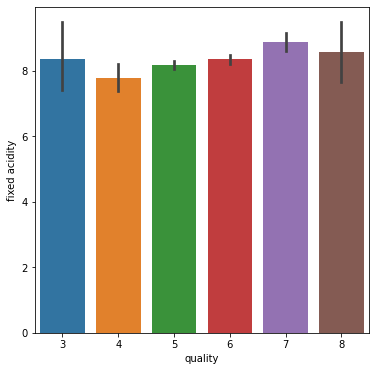

In [13]:
fig = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

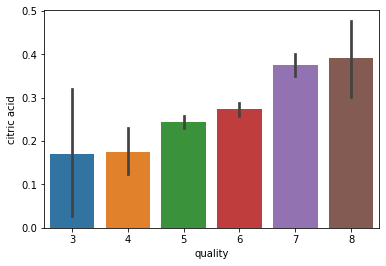

In [19]:
sns.barplot(x='quality',y="citric acid",data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

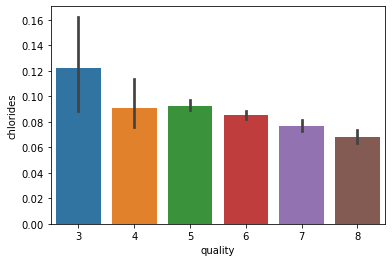

In [20]:
sns.barplot(x="quality",y="chlorides",data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

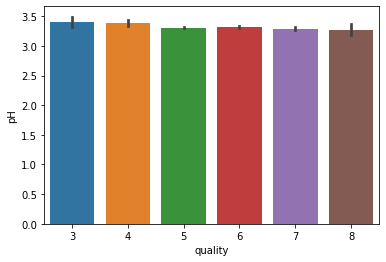

In [22]:
sns.barplot(x = "quality", y = "pH", data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

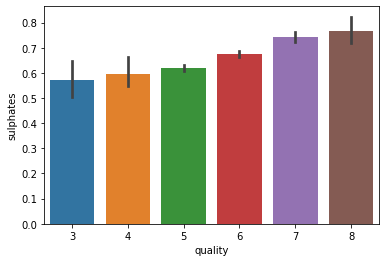

In [23]:
sns.barplot(x = "quality", y = "sulphates", data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

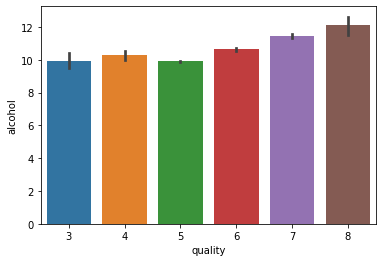

In [24]:
sns.barplot(x = "quality", y = "alcohol", data = df)

In [27]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [44]:
df["Good"]=[1 if i>=7 else 0 for i in df["quality"]]

In [45]:
df["Good"].unique()

array([0, 1])

In [46]:
df["Good"].value_counts()

0    1382
1     217
Name: Good, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,recall_score,precision_score, f1_score, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [48]:
lr = LabelEncoder()

In [49]:
lr.fit(df["Good"])

LabelEncoder()

In [50]:
y_transform = lr.fit_transform(df["Good"])
print(y_transform)
print(y_transform.shape)
np.unique(y_transform)

[0 0 0 ... 0 0 0]
(1599,)


array([0, 1])

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Good', ylabel='count'>

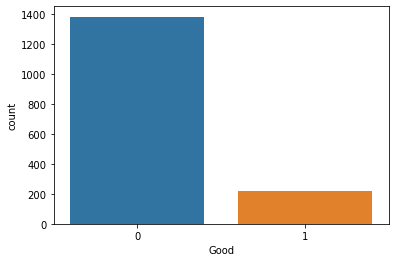

In [51]:
sns.countplot(df["Good"])

In [52]:
features = df.iloc[:,:11]

In [53]:
features[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Testing And Training The Data

In [54]:
x =  df.iloc[:,:11].values

print(x.shape)

y = df["Good"].values
print(y)

(1599, 11)
[0 0 0 ... 0 0 0]


In [55]:
from sklearn.preprocessing import StandardScaler
X_features = x
x = StandardScaler().fit_transform(x)

In [56]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [57]:
print(x_train.shape)
print(y_train.shape)

(1119, 11)
(1119,)


## Decision Tree

In [58]:
Dt = DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=40)

In [59]:
Dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=40)

In [60]:
Dt.score(x_train,y_train)

0.9249329758713136

In [61]:
Dt.score(x_test,y_test)

0.8666666666666667

In [63]:
y_pred_dt = Dt.predict(x_test)
y_pred_dt[:5]

array([0, 0, 0, 0, 0])

In [64]:
c_m = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix :\n",c_m, "\n")

c_r = classification_report(y_test,y_pred_dt)
print("Classfication Report : \n", c_r)

dt_score = accuracy_score(y_test, y_pred_dt)

print("Accuracy:",dt_score)

Confusion Matrix :
 [[393  20]
 [ 44  23]] 

Classfication Report : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       413
           1       0.53      0.34      0.42        67

    accuracy                           0.87       480
   macro avg       0.72      0.65      0.67       480
weighted avg       0.85      0.87      0.85       480

Accuracy: 0.8666666666666667


## K Nearest Neighbor

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
knn.score(x_train,y_train)

0.900804289544236

In [70]:
y_pred_knn=knn.predict(x_test)

In [71]:
y_pred_knn[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
c_m = confusion_matrix(y_test,y_pred_knn)
print("Confusion Matrix :\n",c_m, "\n")

c_r = classification_report(y_test,y_pred_knn)
print("Classfication Report : \n", c_r)

knn_score = accuracy_score(y_test, y_pred_knn)

print("Accuracy:",knn_score)

Confusion Matrix :
 [[388  25]
 [ 37  30]] 

Classfication Report : 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.55      0.45      0.49        67

    accuracy                           0.87       480
   macro avg       0.73      0.69      0.71       480
weighted avg       0.86      0.87      0.87       480

Accuracy: 0.8708333333333333


## Random Forest

In [73]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
rf.score(x_train,y_train)

1.0

In [77]:
rf.score(x_test,y_test)

0.8895833333333333

In [78]:
y_pred_rf = rf.predict(x_test)
y_pred_rf[:5]

array([0, 0, 0, 0, 0])

In [79]:
c_m = confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix :\n",c_m, "\n")

c_r = classification_report(y_test,y_pred_rf)
print("Classfication Report : \n", c_r)

rf_score = accuracy_score(y_test, y_pred_rf)

print("Accuracy:",rf_score)

Confusion Matrix :
 [[395  18]
 [ 35  32]] 

Classfication Report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       413
           1       0.64      0.48      0.55        67

    accuracy                           0.89       480
   macro avg       0.78      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480

Accuracy: 0.8895833333333333


## Using GaussianNB

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [81]:
nb.score(x_train,y_train)

0.8471849865951743

In [82]:
nb.score(x_test,y_test)

0.8354166666666667

In [83]:
y_pred_nb = nb.predict(x_test)

In [84]:
y_pred_nb[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
c_m = confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix :\n",c_m, "\n")

c_r = classification_report(y_test,y_pred_nb)
print("Classfication Report : \n", c_r)

nb_score = accuracy_score(y_test, y_pred_nb)

print("Accuracy:",nb_score)

Confusion Matrix :
 [[354  59]
 [ 20  47]] 

Classfication Report : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       413
           1       0.44      0.70      0.54        67

    accuracy                           0.84       480
   macro avg       0.69      0.78      0.72       480
weighted avg       0.88      0.84      0.85       480

Accuracy: 0.8354166666666667


## Score Evaluation

In [89]:
Evaluation = pd.DataFrame({"Model Used" : ["Decision Tree","Ransom Forest","Gaussian NB","K Nearest"],"Scores" : [dt_score, rf_score, nb_score, knn_score]})

In [91]:
Evaluation.set_index("Scores")
Evaluation = Evaluation.sort_values(by = "Scores", ascending = False)

In [92]:
Evaluation

,Model Used,Scores
1,Ransom Forest,0.889583
3,K Nearest,0.870833
0,Decision Tree,0.866667
2,Gaussian NB,0.835417


Therefore, The <b>Random Forest Classifier</b> has proven to be most effective in predicting whether the quality of wine is good or not.

In [93]:
s = rf.feature_importances_
e = df.columns[0:11]
for s, e in zip(s, e):
    s = round(s*100,4)
    print(e ,":",s)

fixed acidity : 6.6033
volatile acidity : 11.6461
citric acid : 8.1324
residual sugar : 6.5821
chlorides : 7.6293
free sulfur dioxide : 5.9155
total sulfur dioxide : 7.457
density : 9.2555
pH : 6.0333
sulphates : 12.6048
alcohol : 18.1407


In [94]:
l = []
for i in df.columns[0:11]:
    print(i)
    n = input("")
    l.append(n)
print(l)    

rf.predict([l])
if l == 0 :
    print("The quality of wine is good.")
else:
    print("The quality of wine is bad.")

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
['7.4', '0.9', '0.4', '0.5', '0.68', '0.65', '0.70', '0.90', '5', '0.56', '9.5']
The quality of wine is bad.
